<a href="https://colab.research.google.com/github/groda/big_data/blob/master/downloadSpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90" alt="Logo Big Data for Beginners"></div></a>
# How to download and verify the Spark distribution

<br>



In this notebook, we will:

1. [Download the Spark binaries from the `apache.org` website.](#scrollTo=Download_the_Spark_binaries)
2. [Verify their checksum.](#scrollTo=Check_the_hashes)
3. [Validate their signatures.](#scrollTo=Check_signatures)  

Along the way, we'll take a few detours to explore interesting tidbits, share handy shortcuts, and have some “why does this even matter?” moments. Or, as I like to call it, a “chatty tutorial”™—part learning, part conversation.



# 1. Download the Spark binaries

The Apache Spark executables are available for download at the following link:  https://dlcdn.apache.org/spark/

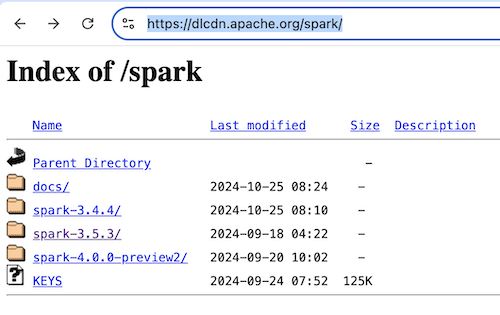

There's currently (as of November 2024) $3$ versions of Spark available:
- `3.4.4`
- `3.5.3`
- `4.0.0` (preview $2$)

## How to decide which version to install

Since release `4.0.0` is a brand-new major version and might not yet have had enough time to be refined or patched, I'm inclined to pick the latest release from the previous major version (`3.5.3`).

This is generally a sensible approach when deciding which version of a software to install. Here's why:

1. **Stability Concerns**:
   - Major versions (in this case `4.0.0`) often introduce significant changes, such as new features, architectural shifts, or deprecated functionalities. These changes can sometimes lead to unforeseen bugs or incompatibilities.
   - Minor and patch releases within a major version (e.g., `3.5.3`) are usually more stable because they tend to focus on fixing bugs and making incremental improvements.

2. **Early Adoption Risks**:
   - Early adopters of a major version are often the first to encounter edge-case issues, and it may take a few minor releases for those to be addressed.
   - Documentation and community support for a brand-new major version might also lag behind.

3. **Pragmatic Risk Management**:
   - By sticking to the last release of the previous major version, you benefit from a version that's been thoroughly tested and patched over time.
   - Once the newer major version (e.g., `4.0.0`) has matured (perhaps after a few patch releases, like 4.0.2 or 4.1.0), you can reconsider upgrading.


### Should you be more risky?
That depends on your use case:
- **Critical or production environments**: Stick with your cautious approach. Stability and reliability are more important here.
- **Testing or exploratory use**: Consider trying the new major version to explore new features and assess whether they're beneficial.
- **Upgrade necessity**: If the new major version addresses a critical issue or offers a must-have feature, you might weigh the potential risks differently.

Your strategy of waiting for a major version to "settle" is widely practiced in both personal and professional settings. It's a calculated decision rather than an overly risk-averse one.

## How to choose the right file to download

Under `spark-3.5.3/` quite a few files are listed

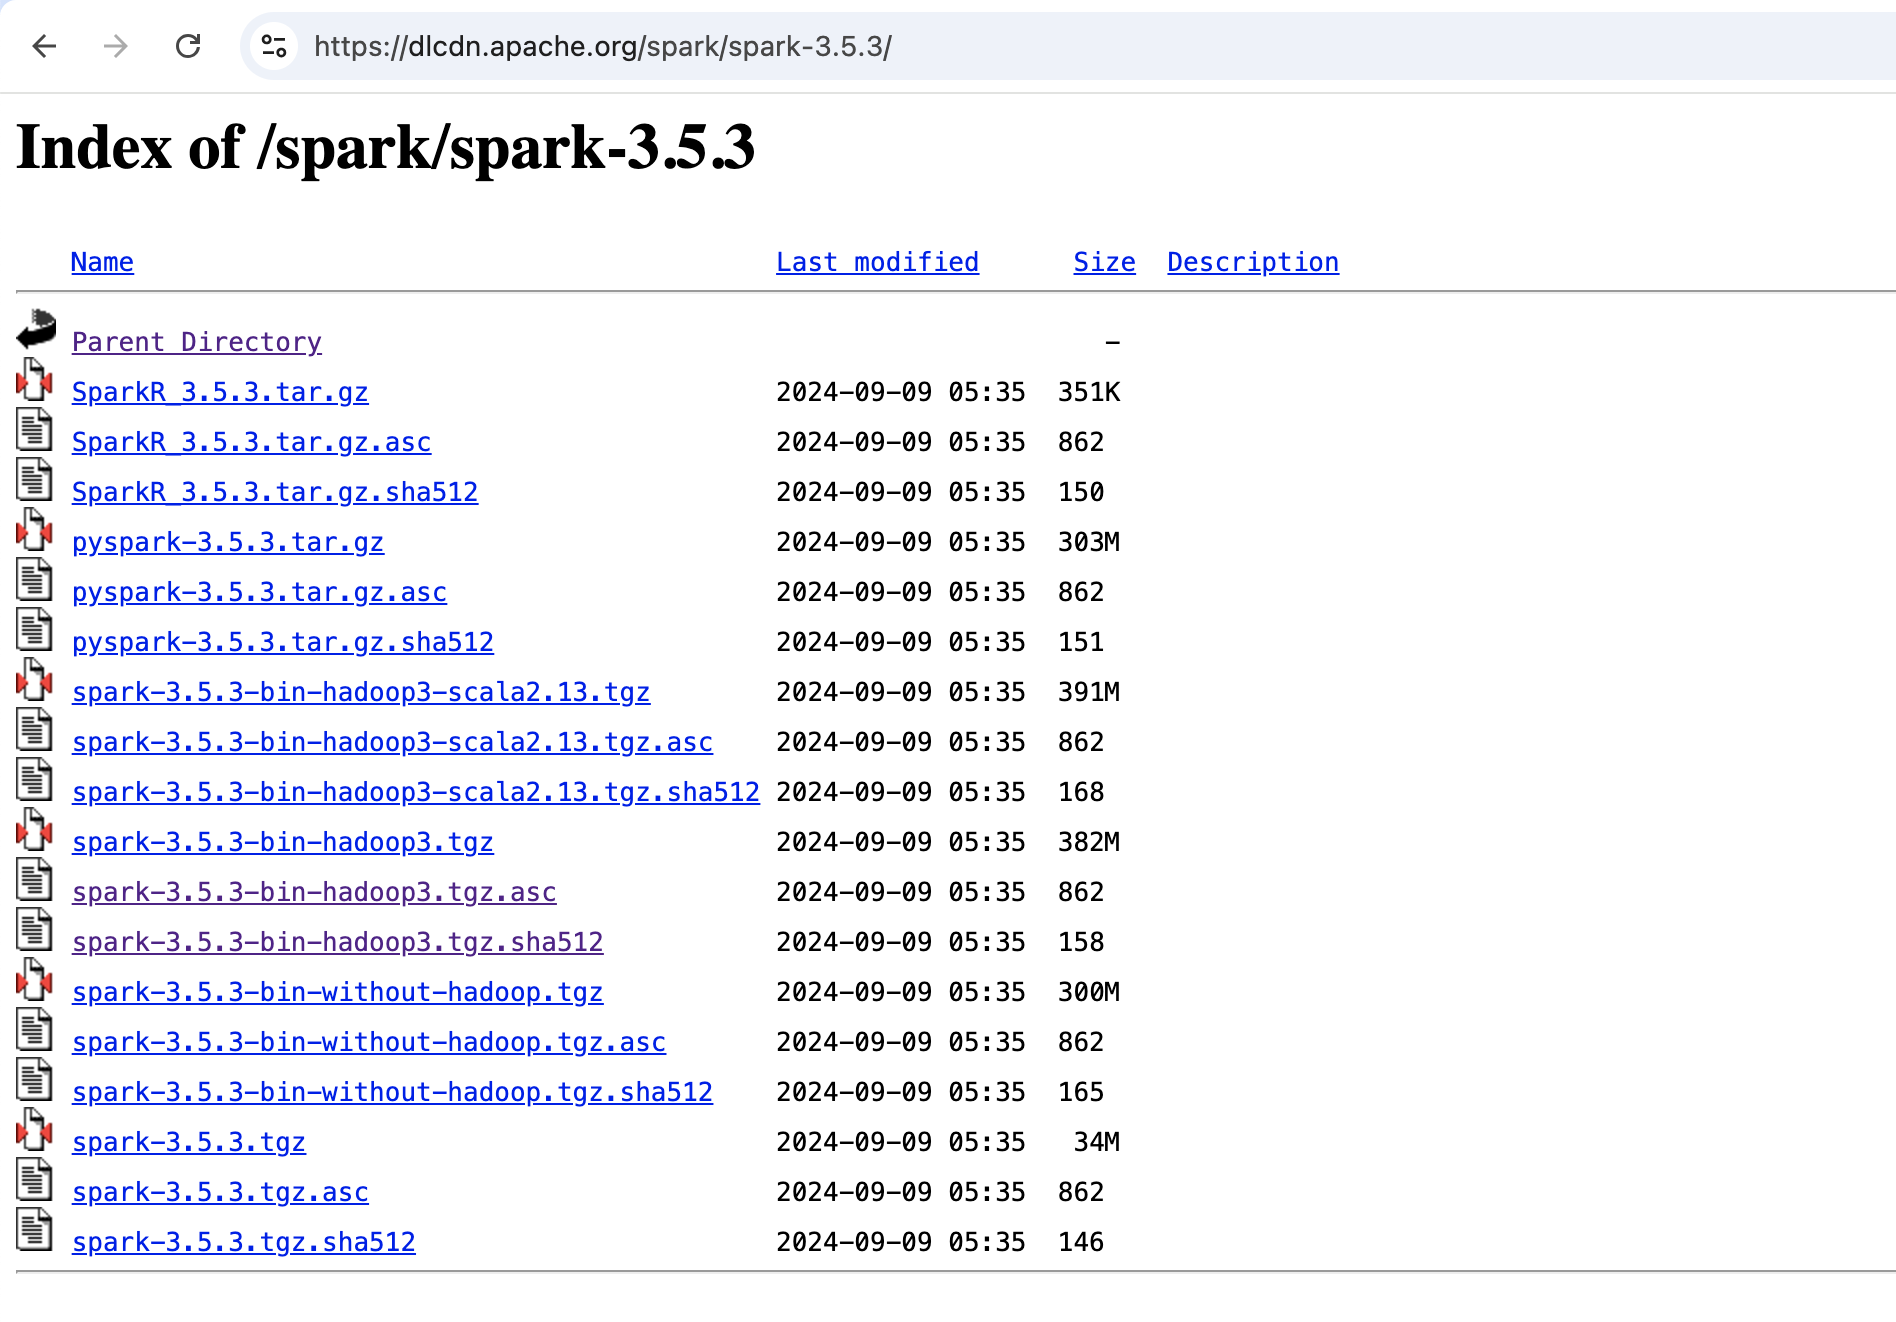

Here's where the Spark Download Web page comes to the rescue! At https://spark.apache.org/downloads.html you can find an explanation of the correspondence between filenames in the repository and their respective distributions. This page also allows you to download your desired distribution directly from the website.

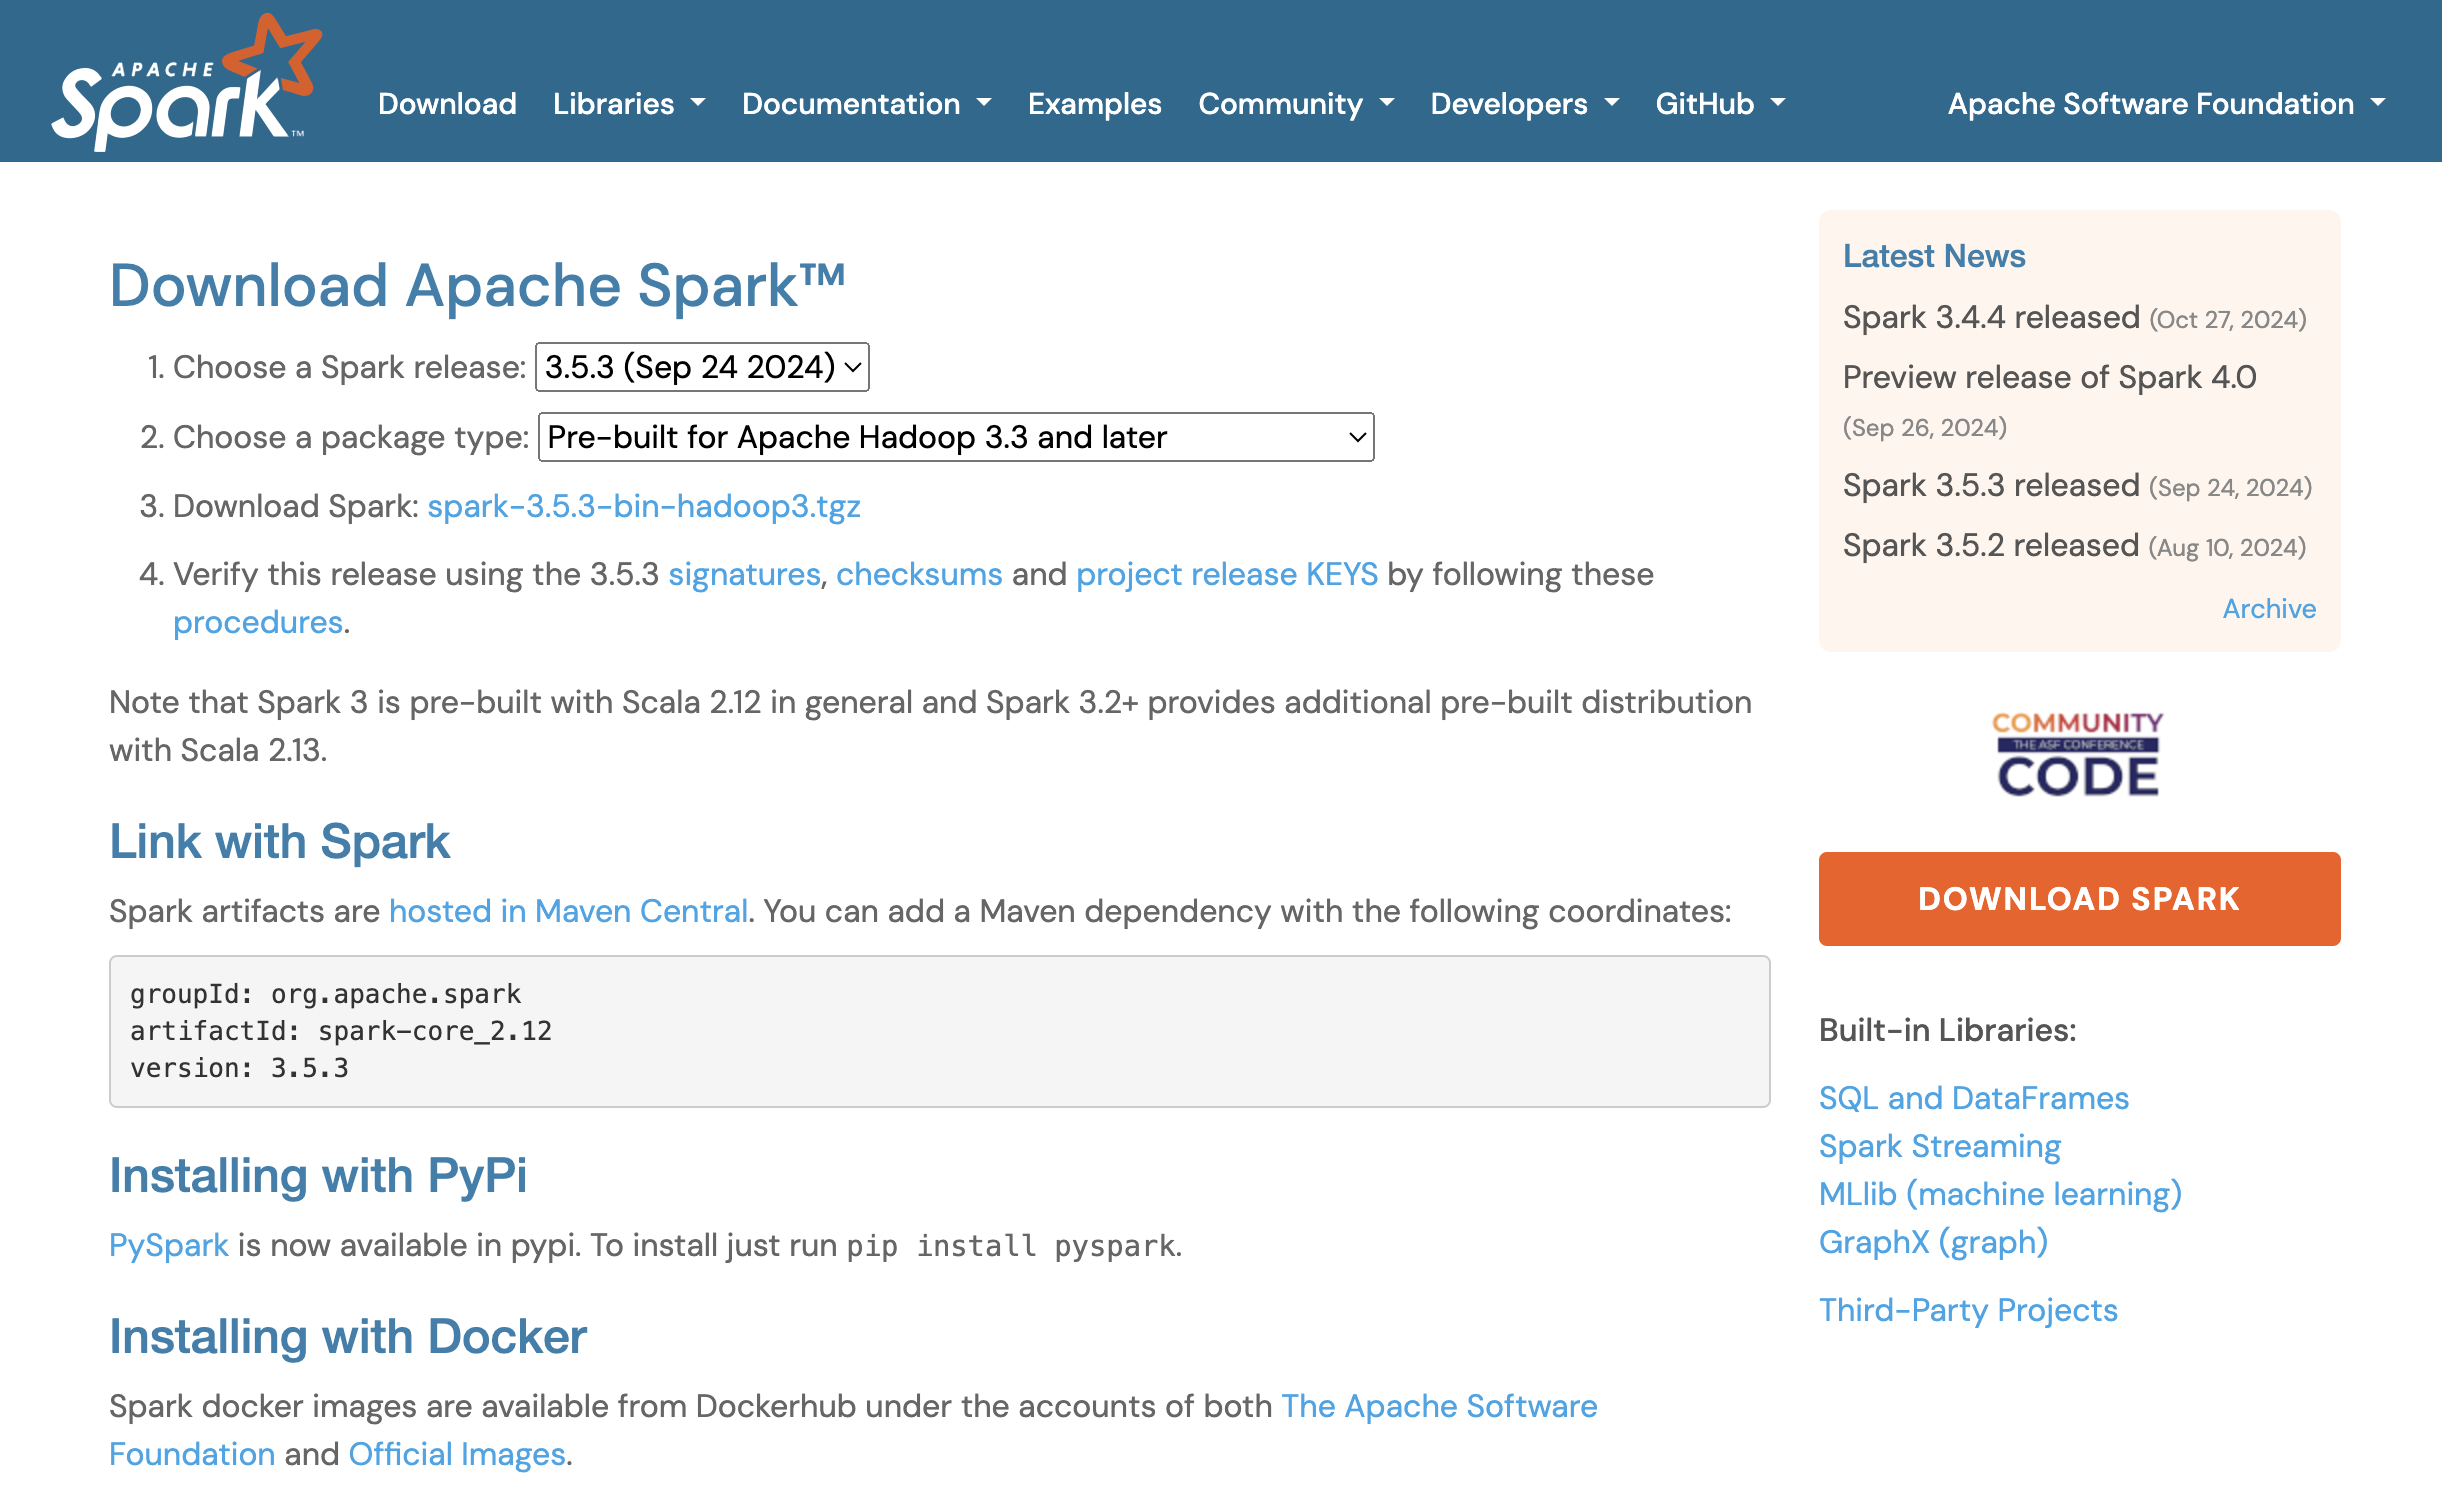

For each release, a few options are presented in the dropdown menu.
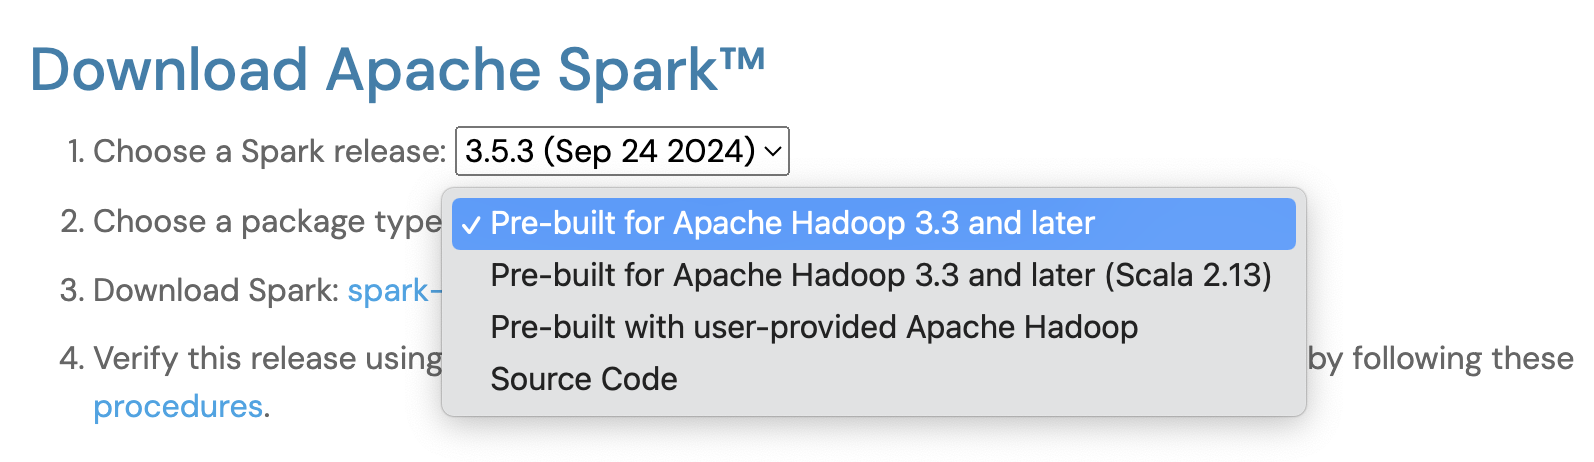

We are going to select "Pre-built for Apache Hadoop 3.3 and later".

This choice is made by excluding the other options available in the dropdown list: since we want a ready-to-use version, we exclude the "Source Code" option; the distribution "with user-provided Apache Hadoop" is unsuitable because it requires Apache Hadoop core to already be installed, which Spark depends on; and finally, the prebuilt version "with Scala 2.13" isn't necessary for now, as we aren't even certain if an additional Scala installation is needed.



We are now finally ready to download `spark-3.5.3-bin-hadoop3.tgz`, the file corresponding to the release `3.5.3` of the "Pre-built for Apache Hadoop 3.3 and later".

## Download `spark-3.5.3-bin-hadoop3.tgz`

We will use the `wget` utility to download `spark-3.5.3-bin-hadoop3.tgz`. The `--no-clobber` option in `wget` prevents overwriting files that already exist on your system. If a file already exists in the directory, `wget --no-clobber` will not download it again thus saving both time and network usage.

In [ ]:
!wget --no-clobber "https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz"

--2024-12-01 20:36:45--  https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400864419 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.3-bin-hadoop3.tgz’

spark-3.5.3-bin-had 100%[===================>] 382.29M   145MB/s    in 2.6s    

2024-12-01 20:36:48 (145 MB/s) - ‘spark-3.5.3-bin-hadoop3.tgz’ saved [400864419/400864419]



Verify that the file has indeed been downloaded

In [ ]:
!ls -lh spark*

-rw-r--r-- 1 root root 383M Sep  9 05:35 spark-3.5.3-bin-hadoop3.tgz


## What's a CDN?

Since we've downloaded thew Spark binaries from a site named "dlcdn.apache.org",  it's a good time to briefly discuss CDNs.

CDN stands for Content Delivery Network, a globally distributed network of servers that delivers content (like files, images, and videos) to users based on their geographic location. The goal of a CDN is to improve download speed, reduce latency, and increase availability.

### The Apache Software Foundation CDN

The Apache Software Foundation (ASF) started using a CDN for software distribution in 2021, transitioning from a traditional mirroring system (read more in the blog entry [Apache Software Foundation moves to CDN distribution for software](https://blogsarchive.apache.org/foundation/entry/apache-software-foundation-moves-to)). The new CDN provides faster downloads and faster deployments of new releases for the (as of 2021) 180 gigabytes of artifacts.

Before switching to CDN, the ASF relied on a mirror infrastructure hosted by individuals and organizations.

A mirror infrastructure is a network of servers that replicate (or "mirror") content from a central source, so users can download files from a server that's geographically closer to them. This helps distribute the load, improve download speeds, and ensure availability even if one server is down.

Here's how it typically worked:

1. **Central Repository**: The main project (like the ASF) would maintain a central repository where all the software releases and other resources were stored.
  
2. **Mirror Servers**: Individuals and organizations volunteered to host copies of this central repository on their own servers. These servers would periodically sync with the central repository to ensure they had the latest version of the files.

3. **Load Distribution**: When users downloaded files, they were directed to the nearest or least busy mirror server, reducing the strain on the central server and speeding up the download process.

4. **Redundancy and Reliability**: Multiple mirrors ensured that even if one server failed or was unreachable, users could still access the files from another mirror.

The main challenge with this setup was ensuring that the mirrors stayed up to date and synchronized with the central repository. CDNs (Content Delivery Networks) later replaced this system because they offer more automated synchronization, better scalability, and faster delivery through a globally distributed network of servers.

For more details, read [History of the Apache Mirror System](https://apache.org/history/mirror-history.html).

## All Spark releases

There are several reasons why you might want to use an older release of Spark, such as compatibility with existing systems, stability, or specific features that have been modified or deprecated in newer versions.

Older Spark releases are available in the archive at: https://archive.apache.org/dist/spark/.

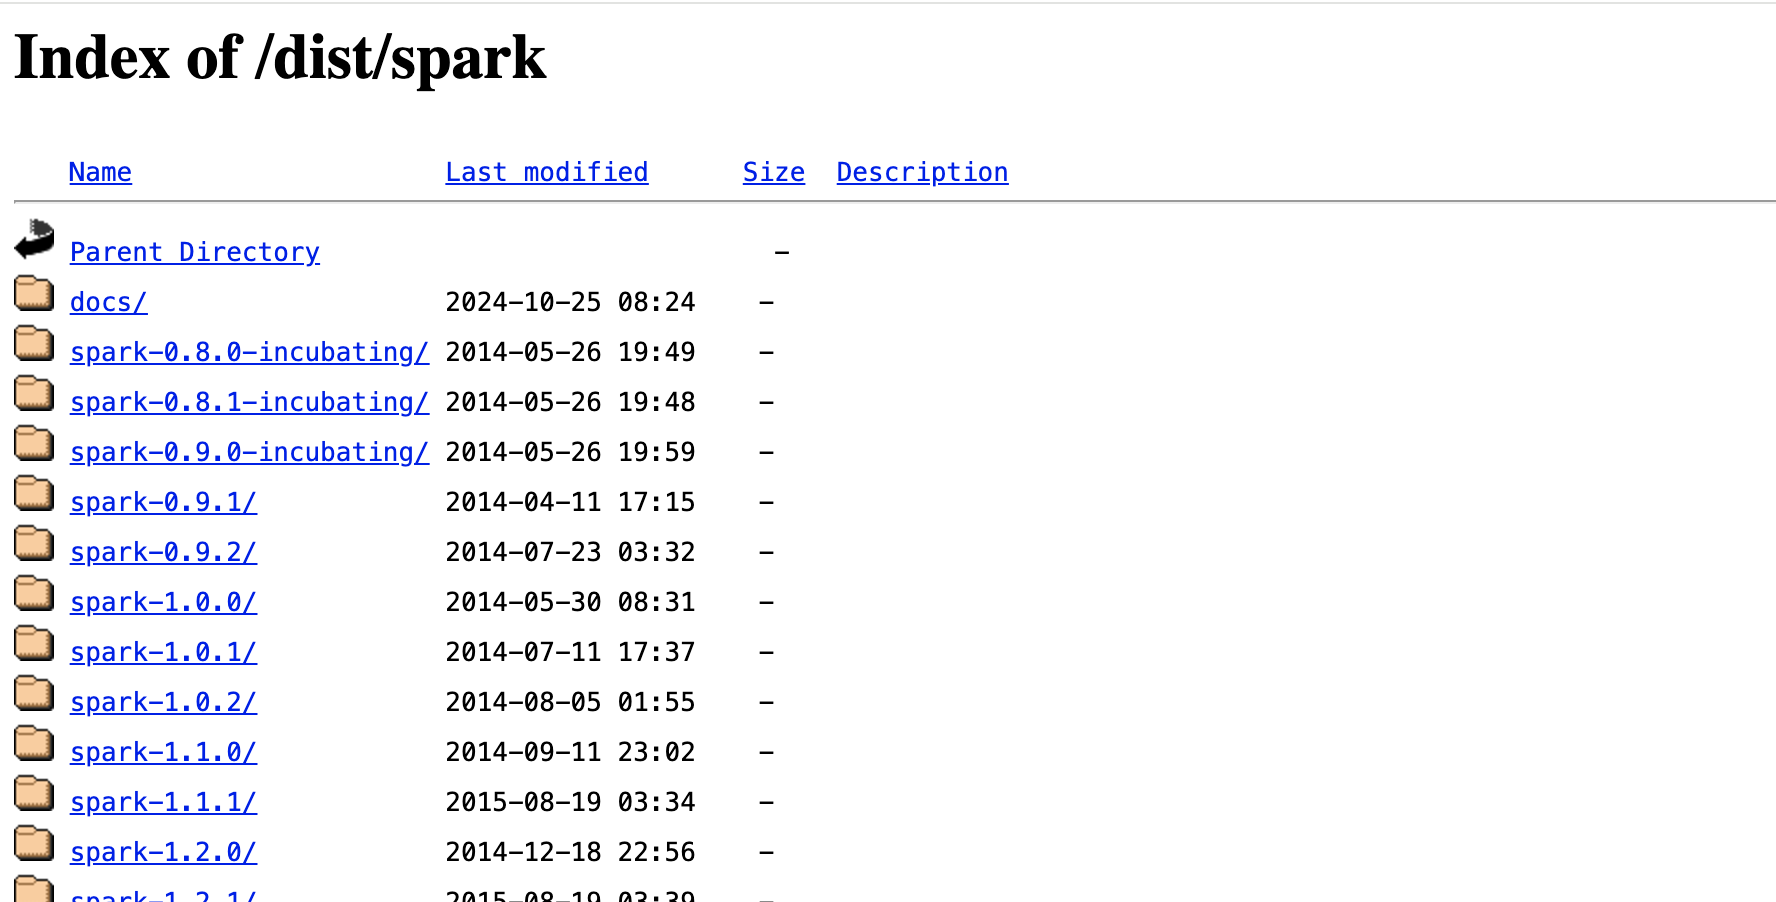

### Tracing the evolution of Spark releases

Let us download the list of all Spark releases in text format and save it to `spark_releases.txt`.

In [ ]:
!curl https://archive.apache.org/dist/spark/ | \
      sed -e 's/<[^>]*>//g' -e 's/^[[:blank:]]*//'| \
      grep "^spark" > spark_releases.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10239    0 10239    0     0  16768      0 --:--:-- --:--:-- --:--:-- 16757


In order to obtain a nice list in text format, I used a practical little snippet from [this answer on Stack Overflow](https://stackoverflow.com/a/12423197) to convert HTML to text.

`'s/<[^>]*>//g'` is the "HTML tag destroyer" while `'s/^[[:blank:]]*//'` is used to trim leading spaces.

The option `-e` is used to concatenate multiple `sed` scripts (see [What is the purpose of -e in sed command?](https://unix.stackexchange.com/questions/33157/what-is-the-purpose-of-e-in-sed-command)).

And here's the file `spark_releases.txt`.

In [ ]:
!cat spark_releases.txt

spark-0.8.0-incubating/ 2014-05-26 19:49    -   
spark-0.8.1-incubating/ 2014-05-26 19:48    -   
spark-0.9.0-incubating/ 2014-05-26 19:59    -   
spark-0.9.1/            2014-04-11 17:15    -   
spark-0.9.2/            2014-07-23 03:32    -   
spark-1.0.0/            2014-05-30 08:31    -   
spark-1.0.1/            2014-07-11 17:37    -   
spark-1.0.2/            2014-08-05 01:55    -   
spark-1.1.0/            2014-09-11 23:02    -   
spark-1.1.1/            2015-08-19 03:34    -   
spark-1.2.0/            2014-12-18 22:56    -   
spark-1.2.1/            2015-08-19 03:39    -   
spark-1.2.2/            2015-08-19 03:40    -   
spark-1.3.0/            2015-08-19 03:39    -   
spark-1.3.1/            2015-04-16 23:47    -   
spark-1.4.0/            2015-08-19 03:42    -   
spark-1.4.1/            2015-07-15 03:39    -   
spark-1.5.0/            2015-09-09 05:58    -   
spark-1.5.1/            2015-10-06 04:54    -   
spark-1.5.2/            2015-11-10 00:22    -   
spark-1.6.0/        

Let's convert the text file `releases.txt` to a Pandas dataframe.

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
# data_table is only available on Google Colab
if IN_COLAB:
  from google.colab import data_table
import pandas as pd
import re

def extract_version_info(name):
  match = re.search(r'spark-(\d+)\.(\d+)\.(\d+)(/)?', name)
  if match:
    return int(match.group(1)), match.group(2), match.group(3), '.'.join(match.group(1,2,3))
  else:
    return None, None, None

df = pd.read_csv('spark_releases.txt', usecols=[0,1], sep="\s+", header=None)
df.columns = ['Name', 'Date']
df['Date'] = pd.to_datetime(df['Date'])
df['Name'] = df['Name'].str.rstrip('/')
df['major'], df['minor'], df['patch'], df['version'] = zip(*df['Name'].apply(extract_version_info)) #df['Name'].apply(extract_version_info)
df

,Name,Date,major,minor,patch,version
0,spark-0.8.0-incubating,2014-05-26,0,8,0,0.8.0
1,spark-0.8.1-incubating,2014-05-26,0,8,1,0.8.1
2,spark-0.9.0-incubating,2014-05-26,0,9,0,0.9.0
3,spark-0.9.1,2014-04-11,0,9,1,0.9.1
4,spark-0.9.2,2014-07-23,0,9,2,0.9.2
...,...,...,...,...,...,...
75,spark-3.5.1,2024-02-22,3,5,1,3.5.1
76,spark-3.5.2,2024-08-10,3,5,2,3.5.2
77,spark-3.5.3,2024-09-18,3,5,3,3.5.3
78,spark-4.0.0-preview1,2024-06-03,4,0,0,4.0.0


Next, we visualize the number of releases per year. Note that we do not make any distinction among releases, but major, minor, and patch releases all count as one.

In [ ]:
df.groupby(df['Date'].dt.year)['Name'].agg(['count']).rename(columns= {'count':'Number of releases per year'})

,Number of releases per year
Date,
2014,10
2015,10
2016,7
2017,1
2018,11
2019,9
2020,5
2021,3
2022,9


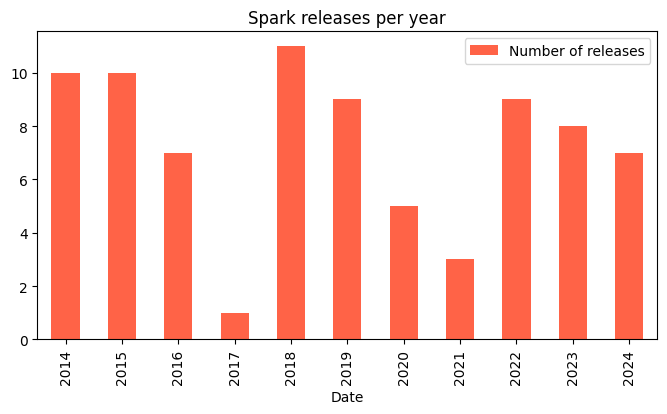

In [ ]:
from matplotlib import pyplot as plt
# Make our plots bigger.
plt.rcParams['figure.figsize'] = (8, 4)
releases_by_year = df.groupby(df['Date'].dt.year)['Name'].agg(['count']).rename(columns= {'count':'Number of releases'})

# Plot the data
releases_by_year.plot(kind="bar", color="tomato", title="Spark releases per year")

# Display the plot
plt.show()

Based on the above graphic, the Spark releases frequency seem to be following a roughly $4$-year cycle. However, not all releases carry the same significance, and it's worth examining the differences.

### Semantic Versioning

Note that we haven't distinguished between different types of releases—such as major, minor, or patch versions.  

For context, _major_, _minor_, and _patch_ are the conventional categories used in _semantic versioning_ (SemVer). These categories indicate the scope of changes in a release:  
- **Major**: Introduces significant changes, often breaking backward compatibility.  
- **Minor**: Adds new features while maintaining backward compatibility.  
- **Patch**: Focuses on bug fixes or small updates without introducing new features.  

### Visualization of yearly releases

Let us refine the bar chart above by visually distinguishing between major, minor, and patch releases.

In [ ]:
df['new_major'] = df.major.ne(df.major.shift())
df['new_minor'] = df.minor.ne(df.minor.shift()) & ~df['new_major']
df['new_patch'] = df.patch.ne(df.patch.shift()) & ~df['new_major'] & ~df['new_minor']

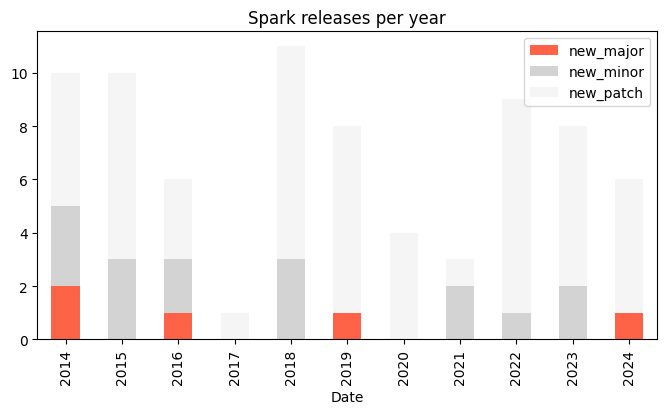

In [ ]:
# Group by year and sum new releases
releases_by_year = df.groupby(df['Date'].dt.year).agg({'new_major':'sum', 'new_minor':'sum', 'new_patch':'sum'})

# Plot stacked bars
releases_by_year[['new_major', 'new_minor', 'new_patch']].plot(kind="bar", stacked=True, color=["tomato", "lightgrey", "whitesmoke"], title="Spark releases per year")

# Display the plot
plt.show()

Add labels for Spark releases in the chart.

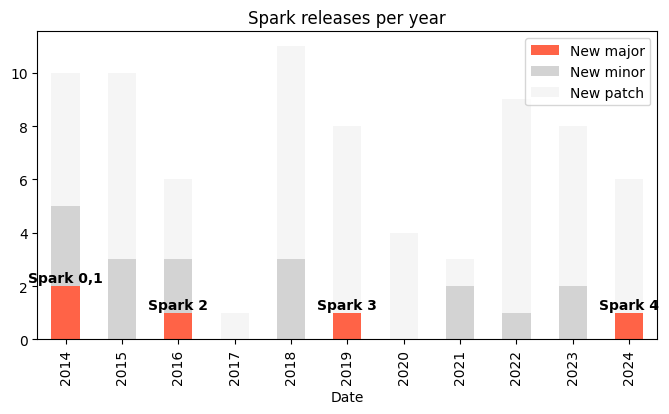

In [ ]:
from collections import defaultdict
# Group by year and sum new releases
releases_by_year = df.groupby(df['Date'].dt.year).agg({'new_major':'sum', 'new_minor':'sum', 'new_patch':'sum'})

# Plot stacked bars
ax = releases_by_year[['new_major', 'new_minor', 'new_patch']] \
     .plot(kind="bar", stacked=True, color=["tomato", "lightgrey", "whitesmoke"],
           title="Spark releases per year")

ax.legend(["New major", "New minor", "New patch"])

# Get the major release years and versions
major_releases = df[df['new_major'] == True]
major_years = major_releases['Date'].dt.year
major_versions = major_releases['major']

# Annotate the major releases
grouped = defaultdict(list)
for key, value in zip(major_years, major_versions):
    grouped[key].append(value)

for year, version in grouped.items():
    ax.text(year - df['Date'].dt.year.min(),
            releases_by_year.loc[year, 'new_major']+0.3,
            f"Spark {','.join(map(str, version))}",
            rotation=0,  # Rotate text
            ha='center', va='center', color='black', fontsize=10, fontweight='bold')

#plt.legend()
plt.show()

Another helpful visualization could be a Gantt chart-style representation, showing the lifespan of each major version (see a Gantt chart example at https://plotly.com/python/gantt/).

In [ ]:
df['Start_major'] = df['Date'].where(df['new_major'], None)
df['End_major'] = df[df['new_major']]['Date'].shift(-1).where(df['new_major'], None)

df['Start_minor'] = df['Date'].where(df['new_minor'], None)
df['End_minor'] = df[df['new_minor']]['Date'].shift(-1).where(df['new_minor'], None)

df['Start_patch'] = df['Date'].where(df['new_patch'], None)
df['End_patch'] = df[df['new_patch']]['Date'].shift(-1).where(df['new_patch'], None)

In [ ]:
import plotly.express as px
from datetime import datetime

df2 = df.query('new_major==True')[['major','Start_major','End_major']]
# # fill in last blank with today's date (row where Start_major is max)
today_date = pd.Timestamp(datetime.today().strftime('%Y-%m-%d'))
df2.loc[df["Start_major"] == df["Start_major"].max(), "End_major"] = today_date

fig = px.timeline(df2,
                  title="Spark releases timeline",
                  x_start="Start_major",
                  x_end="End_major",
                  y="major",
                  color_discrete_sequence=['tomato'])
fig.update_layout(
    title_font=dict(
        size=20,  # You can adjust the font size as needed
        color="black",  # Color of the title
        family="Arial",  # Font family
        weight="bold"  # Make the title bold
    )
)

fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

Show the Spark release in each activity bar (by hovering on the bar the start and end date of each major release is also shown).

Here's an improved visualization with the Spark releases shown on the Gantt chart's bars.

In [ ]:
fig = px.timeline(df2,
                  x_start="Start_major",
                  x_end="End_major",
                  y="major",
                  color_discrete_sequence=['tomato'])
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up

# Add annotations to always display hover information
for i, row in df2.iterrows():
    fig.add_annotation(
        x=(row["Start_major"] + (row["End_major"] - row["Start_major"]) / 2),  # Midpoint of the bar
        y=row["major"],
        text=f"Spark {row['major']}",
        showarrow=False,
        font=dict(size=14, color="black", weight="bold"),
        align="center",
        opacity=1
    )

# Update layout for better visuals
fig.update_layout(
    title="Spark releases timeline",
    xaxis_title="year",
    yaxis_title="major",
    hovermode="x",
    title_font=dict(
        size=20,  # You can adjust the font size as needed
        color="black",  # Color of the title
        family="Arial",  # Font family
        weight="bold"  # Make the title bold
    )
)

fig.show()

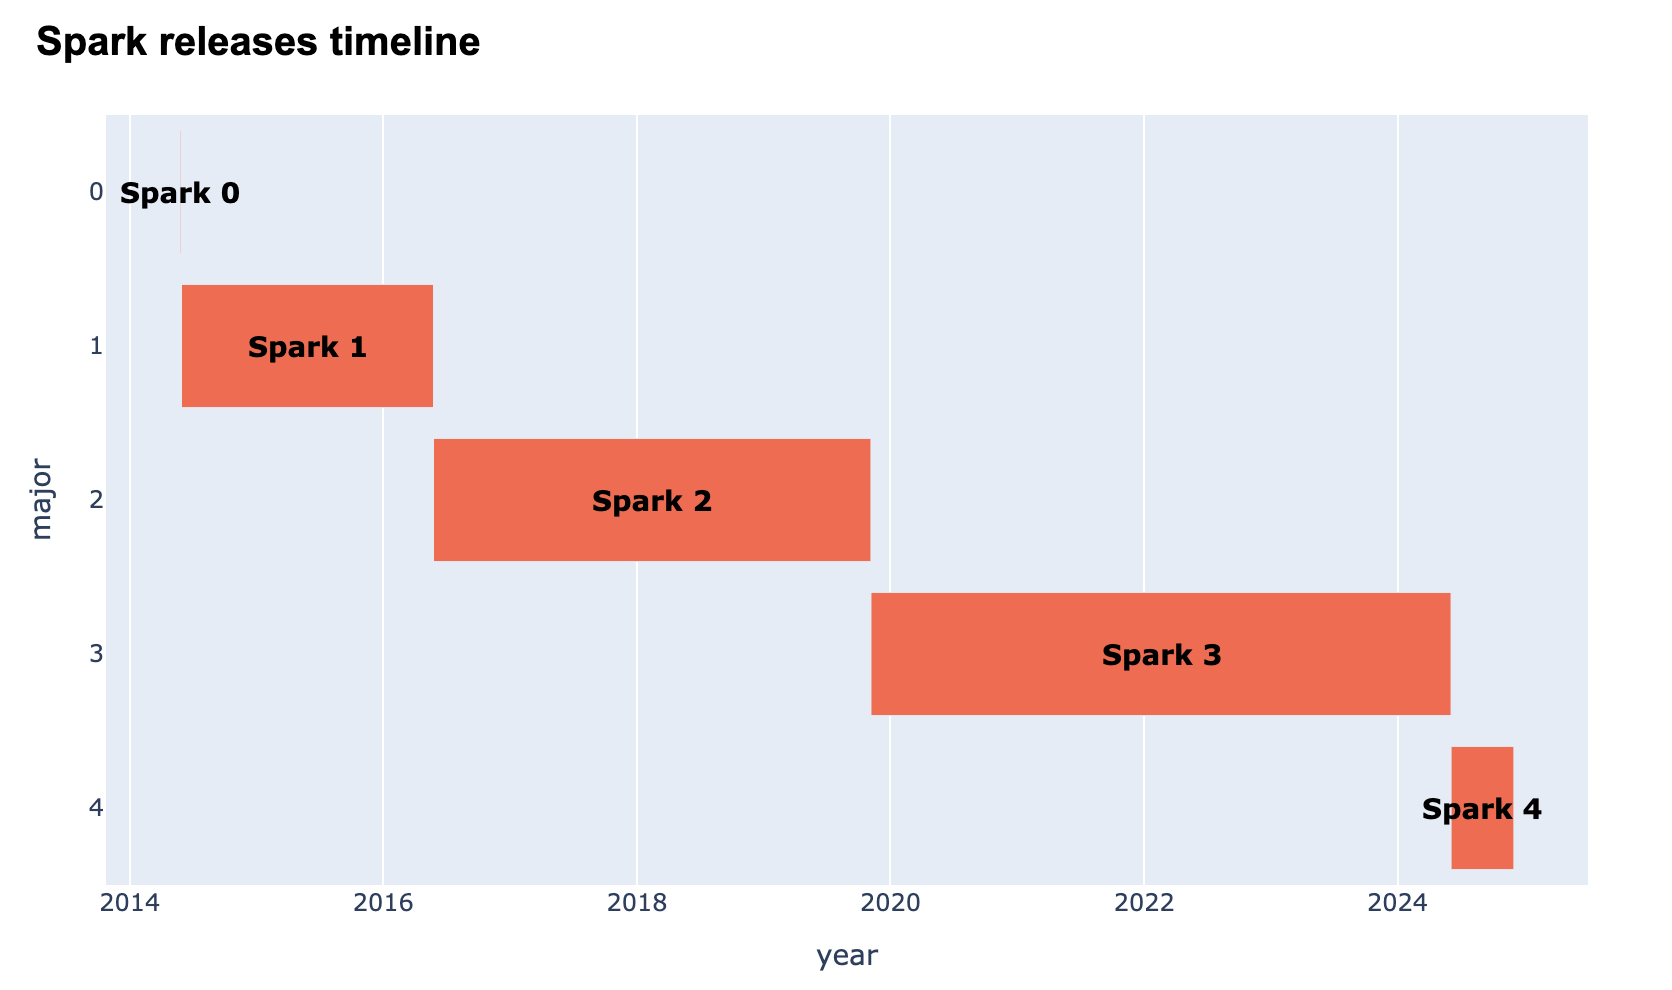

# 2. Check the hashes

After downloading the Spark distribution file, we should _verify the hashes_.


From [https://www.apache.org/info/verification.html#CheckingHashes](https://www.apache.org/info/verification.html#CheckingHashes):


> _File hashes are used to check that a file has been downloaded correctly. They do not provide any guarantees as to the authenticity of the file._
>
> _The checksum of a file is a fixed length string, that (in practice) uniquely identifies the contents of the file. Two files are (only) equal if their checksums are equal. Comparing the checksums of two files is as good as comparing the two files themselves._





Download the SHA-512 checksum of the distribution file

In [ ]:
!wget --no-clobber https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz.sha512

--2024-12-01 20:37:07--  https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz.sha512
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158 [text/plain]
Saving to: ‘spark-3.5.3-bin-hadoop3.tgz.sha512’

spark-3.5.3-bin-had 100%[===================>]     158  --.-KB/s    in 0s      

2024-12-01 20:37:07 (4.75 MB/s) - ‘spark-3.5.3-bin-hadoop3.tgz.sha512’ saved [158/158]



Verify that the computed SHA-512 checksum and the downloaded checksums are identical.

In [ ]:
%%bash
if [[ $(sha512sum spark-3.5.3-bin-hadoop3.tgz | awk '{print $1}') == $(cat spark-3.5.3-bin-hadoop3.tgz.sha512 | awk '{print $1}') ]]; then
    echo "The files are identical."
else
    echo "The files are different."
fi

The files are identical.


Equivalently, we can compute the SHA-512 checksum using Python's `hashlib`:

In [ ]:
import hashlib

def hash_file(file_path, algorithm='sha512'):
    """
    Calculates the hash of a file using the specified algorithm.

    :param file_path: Path to the file
    :param algorithm: Hash algorithm to use ('sha512' for SHA512)
    :return: Hexadecimal digest of the hash
    """
    hash_func = hashlib.new(algorithm)
    with open(file_path, 'rb') as f:
        while chunk := f.read(8192):
            hash_func.update(chunk)
    return hash_func.hexdigest()

def compare_hash_in_file(file_path, target_hash):
    """
    Compares the given hash with the first field (assumed to be a hash) of the single line in the file.

    :param file_path: Path to the file containing the hash and filename
    :param target_hash: The hash to compare with the first field in the file
    :return: True if the target_hash is found in the first field of the line, False otherwise
    """
    with open(file_path, 'r') as file:
        line = file.readline().strip()  # Read the single line and strip any extra whitespace
        fields = line.split()  # Split the line into fields (assuming space separation)
        if fields and fields[0] == target_hash:
            return True  # Found a match
    return False  # No match found

In [ ]:
file_path = 'spark-3.5.3-bin-hadoop3.tgz'  # Replace with your file's path
hash_result = hash_file(file_path)
print(f"SHA512 hash: {hash_result}")

SHA512 hash: 3b041e538282c15ad3b0ab2f05d558e1be2d16e047c2a98ca9c08176c4a50e7101bd2199aec97a66fdabf4b3f490c2c1cefd547bbe35a1b3e3143e066948ee6d


In [ ]:
compare_hash_in_file('spark-3.5.3-bin-hadoop3.tgz.sha512', hash_result)

True

# 3. Check signatures

Let's download the signature file

In [ ]:
!wget --no-clobber https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz.asc

--2024-12-01 20:37:10--  https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz.asc
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862 [text/plain]
Saving to: ‘spark-3.5.3-bin-hadoop3.tgz.asc’

spark-3.5.3-bin-had 100%[===================>]     862  --.-KB/s    in 0s      

2024-12-01 20:37:11 (17.3 MB/s) - ‘spark-3.5.3-bin-hadoop3.tgz.asc’ saved [862/862]



Verify

In [ ]:
!gpg --verify spark-3.5.3-bin-hadoop3.tgz.asc spark-3.5.3-bin-hadoop3.tgz

gpg: directory '/root/.gnupg' created
gpg: keybox '/root/.gnupg/pubring.kbx' created
gpg: Signature made Mon 09 Sep 2024 05:33:46 AM UTC
gpg:                using RSA key 0A2D660358B6F6F8071FD16F6606986CF5A8447C
gpg:                issuer "haejoon@apache.org"
gpg: Can't check signature: No public key


The message

    gpg: Can't check signature: No public key

means that we need to download the public key.

From [https://www.apache.org/info/verification.html#CheckingSignatures](https://www.apache.org/info/verification.html#CheckingSignatures):


> _This means that we don't have the release manager's public key in our local system. You now need to retrieve the public key from a key server. One popular server is [pgpkeys.mit.edu](https://pgpkeys.mit.edu) (which has a web interface)._

In [ ]:
!gpg --keyserver pgpkeys.mit.edu --recv-key '0A2D660358B6F6F8071FD16F6606986CF5A8447C'

gpg: keyserver receive failed: No data


Try with another server ([keys.openpgp.org](https://keys.openpgp.org))

In [ ]:
!gpg --keyserver keys.openpgp.org --recv-key '0A2D660358B6F6F8071FD16F6606986CF5A8447C'

gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 6606986CF5A8447C: public key "Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


This time the key search was successful!

Let's proceed with the verification.


In [ ]:
!gpg --verify spark-3.5.3-bin-hadoop3.tgz.asc spark-3.5.3-bin-hadoop3.tgz

gpg: Signature made Mon 09 Sep 2024 05:33:46 AM UTC
gpg:                using RSA key 0A2D660358B6F6F8071FD16F6606986CF5A8447C
gpg:                issuer "haejoon@apache.org"
gpg: Good signature from "Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>" [unknown]
gpg: WARNING: This key is not certified with a trusted signature!
gpg:          There is no indication that the signature belongs to the owner.
Primary key fingerprint: 0A2D 6603 58B6 F6F8 071F  D16F 6606 986C F5A8 447C


The verification was successful, albeit we don't trust this key.

From "[Checking signatures](https://www.apache.org/info/verification.html#CheckingSignatures)":
> _A "good signature" means that the file has not been tampered with. However, due to the nature of public key cryptography, you need to additionally verify that key DE885DD3 was created by the real Sander Striker._
>
> _Any attacker can create a public key and upload it to the public key servers. They can then create a malicious release signed by this fake key. Then, if you tried to verify the signature of this corrupt release, it would succeed because the key was not the 'real' key. Therefore, you need to validate the authenticity of this key._

## Verifying GPG keys fingerprints

Let us check the fingerprints of all keys in our GPG _keyring_ (a keyring  is a secure storage location used by GPG, SSH to manage and store cryptographic keys):

In [ ]:
!gpg --fingerprint

/root/.gnupg/pubring.kbx
------------------------
pub   rsa4096 2024-09-03 [SC]
      0A2D 6603 58B6 F6F8 071F  D16F 6606 986C F5A8 447C
uid           [ unknown] Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>
sub   rsa4096 2024-09-03 [E]



The first line

    pub   rsa4096 2024-09-03 [SC]
  
shows the type of key (a public RSA key of length $4096$ bits) and the key's creation date (`2024-09-03`).
`[SC]` represents the key capabilities:

*  `S`: Signing. The key can be used to sign data, such as emails or files, to prove authenticity.
*  `C`: Certification. The key can be used to certify other keys, ensuring their validity.

`0A2D 6603 58B6 F6F8 071F D16F 6606 986C F5A8 447C` is the fingerprint of the public key, which is a unique, shorter identifier derived from the full key.

`uid` is the User ID associated with the key.

`[ unknown]` indicates the key's trust status. Unknown status means that GPG doesn't yet trust the key or hasn't been configured to trust it.

`Haejoon Lee (CODE SIGNING KEY)` is the name and the associated identifier for the key. The text in parentheses typically describes the purpose of the key, which in this case is for code signing.

Finally, `haejoon@apache.org` is the email address associated with the key, identifying the person or entity that owns the key.


Note that we could have also used `gpg --fingerprint 0A2D660358B6F6F8071FD16F6606986CF5A8447C` since our GPG ring contains just one key.

In [ ]:
!gpg --fingerprint 0A2D660358B6F6F8071FD16F6606986CF5A8447C

pub   rsa4096 2024-09-03 [SC]
      0A2D 6603 58B6 F6F8 071F  D16F 6606 986C F5A8 447C
uid           [ unknown] Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>
sub   rsa4096 2024-09-03 [E]



## The GPG Web of trust

In order to be able to trust a key we need some way of validating it. See also: [Validating other keys on your public keyring](https://www.gnupg.org/gph/en/manual.html#AEN335).

GPG supports a _Web of trust_, that is is a decentralized system used to establish the authenticity of cryptographic keys. In this model, users sign each other's keys to vouch for their identity. Trust is built by relying on the signatures of others, rather than a central authority, allowing users to assess the validity of a key based on how many trusted individuals have signed it.

So, to trust a key, you have two main options:
- **Verify it yourself**, for instance, by contacting the key owner directly.
- **Assess the number of keys that trust it**; if the key has been signed by many trusted keys, you can decide to trust it as well.

Since most Apache developers have validated each other’s keys, to trust a developer's key, it’s often sufficient to trust the key of another Apache developer who is already trusted within the community (Apache developers are in the KEYS file located at: [https://dlcdn.apache.org/spark/KEYS](https://dlcdn.apache.org/spark/KEYS)).

In [ ]:
!wget --no-clobber https://dlcdn.apache.org/spark/KEYS

--2024-12-01 20:38:10--  https://dlcdn.apache.org/spark/KEYS
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128085 (125K)
Saving to: ‘KEYS’

KEYS                100%[===================>] 125.08K  --.-KB/s    in 0.04s   

2024-12-01 20:38:11 (3.16 MB/s) - ‘KEYS’ saved [128085/128085]



Here are the keys

In [ ]:
!gpg --import KEYS

gpg: key 7B165D2A15E06093: public key "Andrew Or <andrewor14@gmail.com>" imported
gpg: key 6B32946082667DC1: public key "Xiangrui Meng (CODE SIGNING KEY) <meng@apache.org>" imported
gpg: key B1A91F0000799F7E: public key "Patrick Wendell <pwendell@gmail.com>" imported
gpg: key 7C6C105FFC8ED089: public key "Patrick Wendell <pwendell@gmail.com>" imported
gpg: key 5D951CFF87FD1A97: public key "Tathagata Das (CODE SIGNING KEY) <tdas@apache.org>" imported
gpg: key 548F5FEE9E4FE3AF: public key "Patrick Wendell <pwendell@gmail.com>" imported
gpg: key A70A1B29E90ADC5D: 1 signature not checked due to a missing key
gpg: key A70A1B29E90ADC5D: public key "Holden Karau (CODE SIGNING KEY) <holden@apache.org>" imported
gpg: key B6C8B66085040118: public key "Felix Cheung (CODE SIGNING KEY) <felixcheung@apache.org>" imported
gpg: key DCE4BFD807461E96: public key "Sameer Agarwal (CODE SIGNING KEY) <sameerag@apache.org>" imported
gpg: key FD8FFD4C3A0D5564: 3 signatures not checked due to missing keys
gpg:

In [ ]:
!gpg --check-signatures

/root/.gnupg/pubring.kbx
------------------------
pub   rsa4096 2024-09-03 [SC]
      0A2D660358B6F6F8071FD16F6606986CF5A8447C
uid           [ unknown] Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>
sig!3        6606986CF5A8447C 2024-09-03  Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>
sub   rsa4096 2024-09-03 [E]
sig!         6606986CF5A8447C 2024-09-03  Haejoon Lee (CODE SIGNING KEY) <haejoon@apache.org>

pub   rsa4096 2014-11-13 [SC]
      A864F0C3E5262F9A229B85D07B165D2A15E06093
uid           [ unknown] Andrew Or <andrewor14@gmail.com>
sig!3        7B165D2A15E06093 2014-11-13  Andrew Or <andrewor14@gmail.com>
sub   rsa4096 2014-11-13 [E]
sig!         7B165D2A15E06093 2014-11-13  Andrew Or <andrewor14@gmail.com>

pub   rsa4096 2014-07-17 [SC]
      3E1CBD0F0533D602E80C6E986B32946082667DC1
uid           [ unknown] Xiangrui Meng (CODE SIGNING KEY) <meng@apache.org>
sig!3        6B32946082667DC1 2014-07-17  Xiangrui Meng (CODE SIGNING KEY) <meng@apache.org>
sub   rsa4096 201